In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Generate synthetic time-series data for demonstration

dates = pd.date_range(start="2020-01-01", periods=100)
data = pd.DataFrame({
    "Date": dates,
    "Sales": np.random.randint(100, 500, size=100).cumsum(),  # Simulated increasing sales trend
    "Website_Visits": np.random.randint(500, 1500, size=100),
    "Ad_Spend": np.random.randint(1000, 5000, size=100)
})
data.set_index("Date", inplace=True)

### **1. Basic Time-Series Plot**

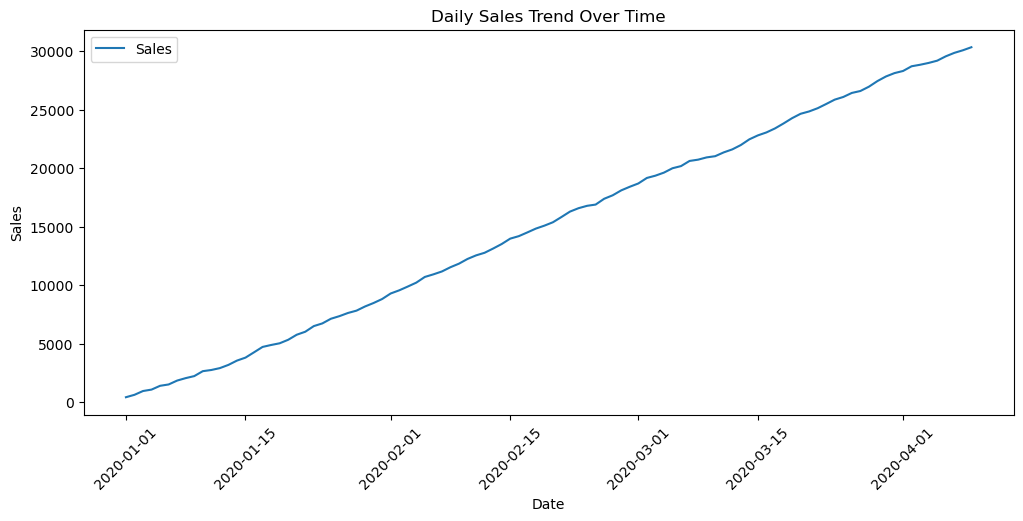

In [10]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x=data.index, y="Sales", label="Sales")
plt.title("Daily Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### **2. Rolling Mean for Trend Analysis**

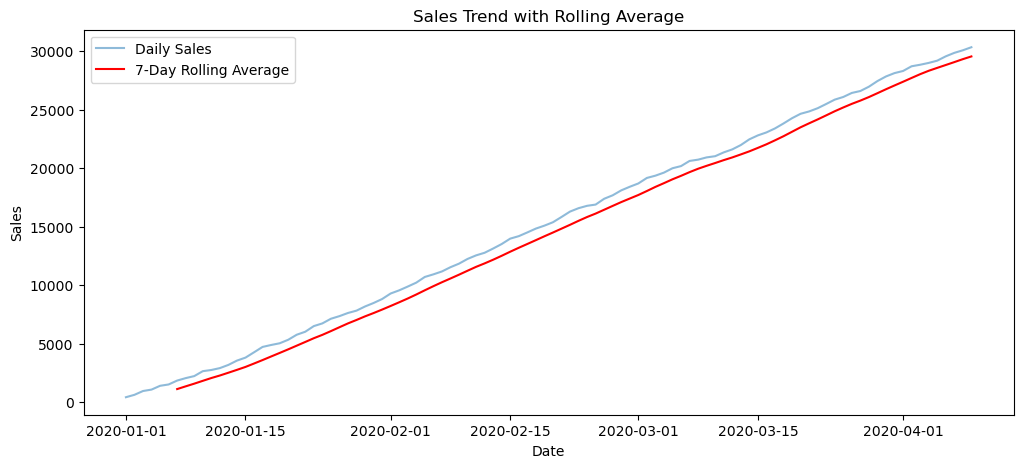

In [14]:

data["Sales_Rolling"] = data["Sales"].rolling(window=7).mean()
plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x=data.index, y="Sales", label="Daily Sales", alpha=0.5)
sns.lineplot(data=data, x=data.index, y="Sales_Rolling", label="7-Day Rolling Average", color="red")
plt.title("Sales Trend with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### **3. Comparing Multiple Time-Series Data**

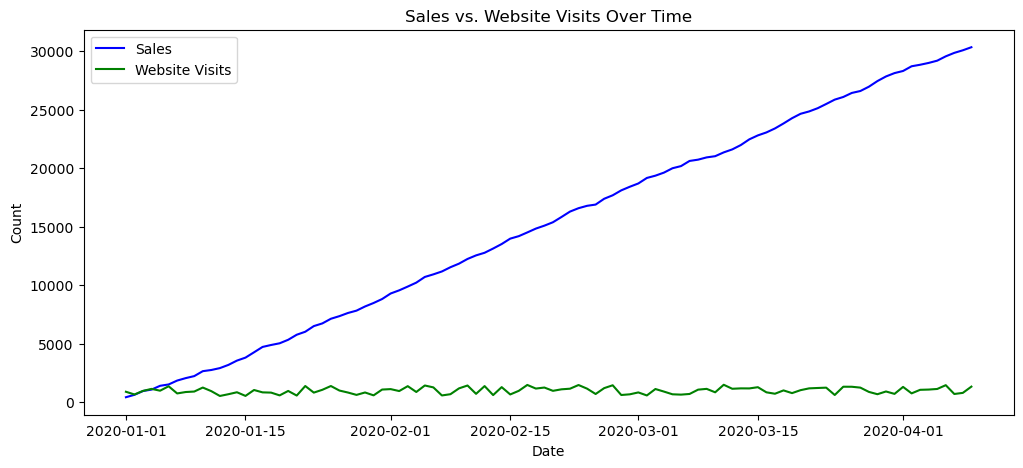

In [18]:

plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x=data.index, y="Sales", label="Sales", color="blue")
sns.lineplot(data=data, x=data.index, y="Website_Visits", label="Website Visits", color="green")
plt.title("Sales vs. Website Visits Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

### **4. Seasonal Pattern Detection (Month-wise Sales Analysis)**

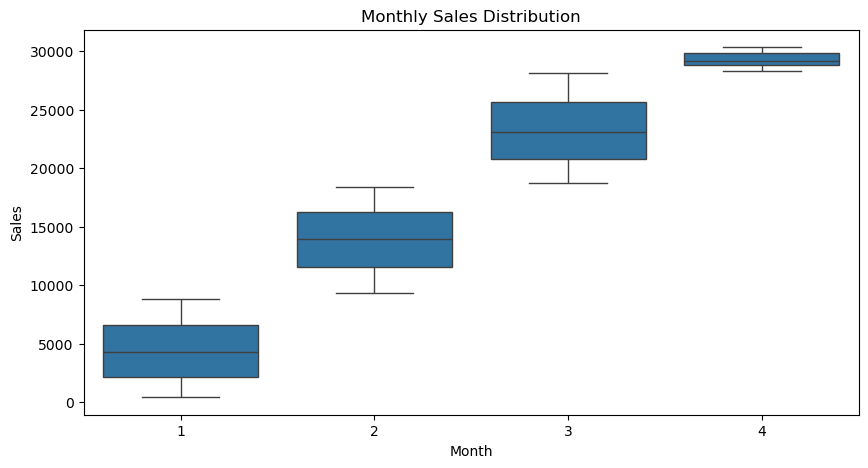

In [21]:

data["Month"] = data.index.month
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["Month"], y=data["Sales"])
plt.title("Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

### **5. Event Annotations on Time Series**

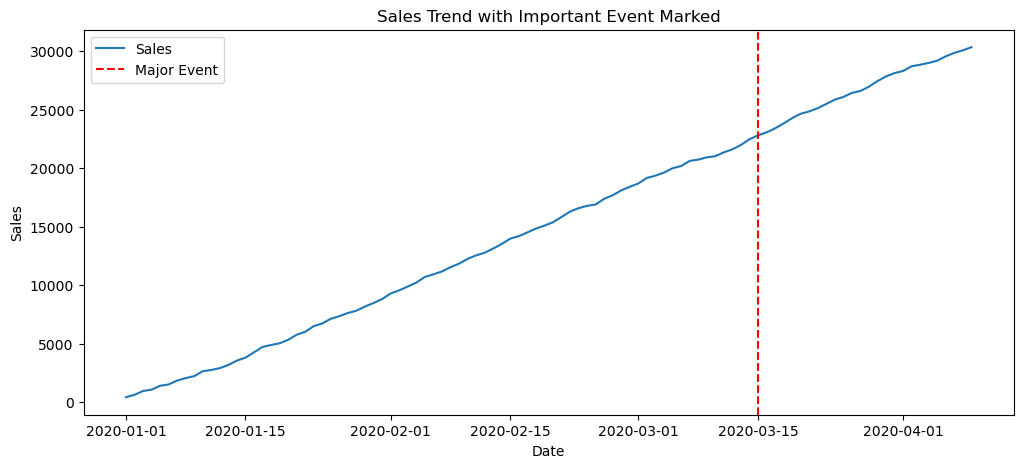

In [24]:

plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x=data.index, y="Sales", label="Sales")
plt.axvline(pd.Timestamp("2020-03-15"), color="red", linestyle="--", label="Major Event")
plt.title("Sales Trend with Important Event Marked")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### **6. Lag Plot to Identify Autocorrelation**

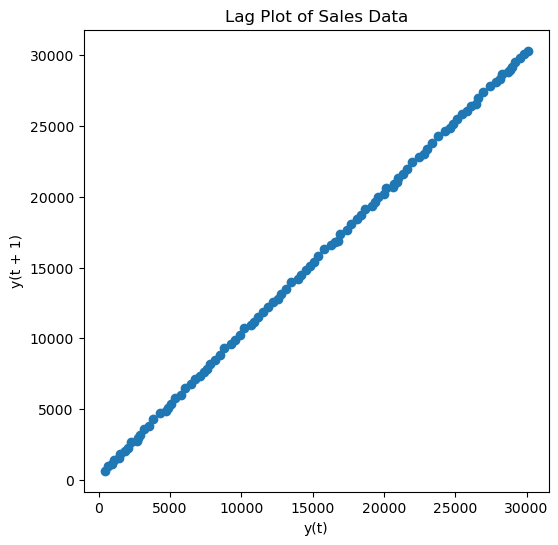

In [26]:
from pandas.plotting import lag_plot
plt.figure(figsize=(6, 6))
lag_plot(data["Sales"])
plt.title("Lag Plot of Sales Data")
plt.show()

### **7. Autocorrelation Plot**

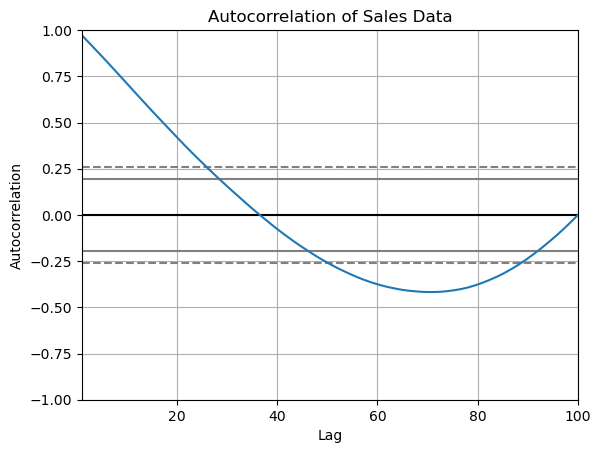

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data["Sales"])
plt.title("Autocorrelation of Sales Data")
plt.show()